   #### Mawrer Amed Ramirez Martinez ms723737@iteso.mx
   #### Avance de TOG IDI 4

#  Ajuste de Dataset (Adding Multiple Indicators)


In [1]:
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
from datetime import datetime
import seaborn as sns
import pandas as pd
import os, glob

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
SOURCE_TYPE = "EURUSD_FULL"
FRECUENCIA = "1D"
NUM_FEATURES = 0

In [5]:
pwd = os.getcwd()
datasource_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados/')
filenames = glob.glob(datasource_path + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))

EURUSD_ASK_1H_14F.csv
EURUSD_FULL_1D_20F.csv
EURUSD_FULL_1H_20F.csv
EURUSD_FULL_1M_20F.csv
EURUSD_FULL_4H_20F.csv


## Read CSV

### Read Dataset From Regression

In [6]:
if FRECUENCIA =="1D":
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
else:
    dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
DATASET_FULL = pd.read_csv(filenames[1], header=0, parse_dates=['Gmt time'], date_parser=dateparse)
print(DATASET_FULL)
print(DATASET_FULL.shape)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid    Volume_Bid   

### Add EMA Function

In [7]:
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(com=0.5).mean(), name = 'EMA_Close_' + str(n))
    df = df.join(EMA)  
    return df

In [8]:
DATASET_FULL = EMA(DATASET_FULL, 5)
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,Spread,day_name,weekday,Pct_Range_Close,Pct_Range_Close_diff,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200,EMA_Close_5
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,0.00010,Thursday,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.257330
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,0.00026,Friday,4,0.000787,0.000787,0.000000,0.000000,0.000000,0.000000,1.258072
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,0.00010,Sunday,6,0.003862,0.003075,0.000000,0.000000,0.000000,0.000000,1.261608
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,0.00010,Monday,0,0.004053,0.000191,0.000000,0.000000,0.000000,0.000000,1.266125
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,0.00010,Tuesday,1,0.002523,-0.001530,1.263726,0.000000,0.000000,0.000000,1.269723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2020-05-26,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,...,0.00003,Tuesday,1,0.007045,0.007631,1.092892,1.088177,1.088072,1.101322,1.095430
5133,2020-05-27,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,...,0.00003,Wednesday,2,0.003479,-0.003565,1.094242,1.088913,1.088046,1.101344,1.099603
5134,2020-05-28,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,...,0.00003,Thursday,3,0.005564,0.002085,1.097680,1.089716,1.088150,1.101403,1.105081
5135,2020-05-29,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,...,0.00035,Friday,4,0.002609,-0.002955,1.101656,1.090363,1.088460,1.101465,1.108834


In [9]:
DATASET_FULL['EMA_Close_5'].describe()

count    5137.000000
mean        1.263954
std         0.122738
min         1.040019
25%         1.149416
50%         1.270799
75%         1.351185
max         1.594288
Name: EMA_Close_5, dtype: float64

In [10]:
DATASET_FULL['EMA_Close_5'].isnull().sum()

0

(5137, 21)


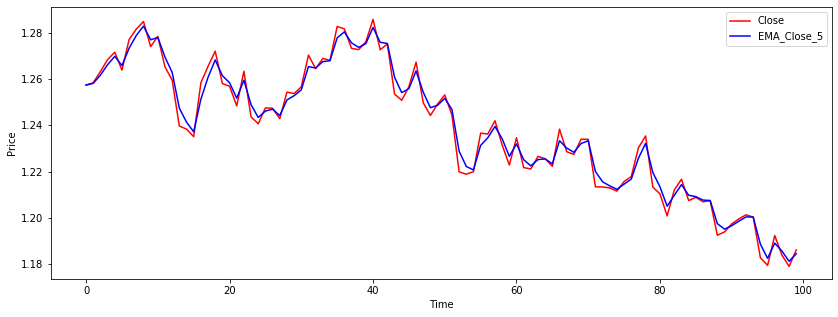

In [11]:
INICIO = 0
FIN = 100
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['EMA_Close_5'][INICIO:FIN], color = 'blue', label = 'EMA_Close_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

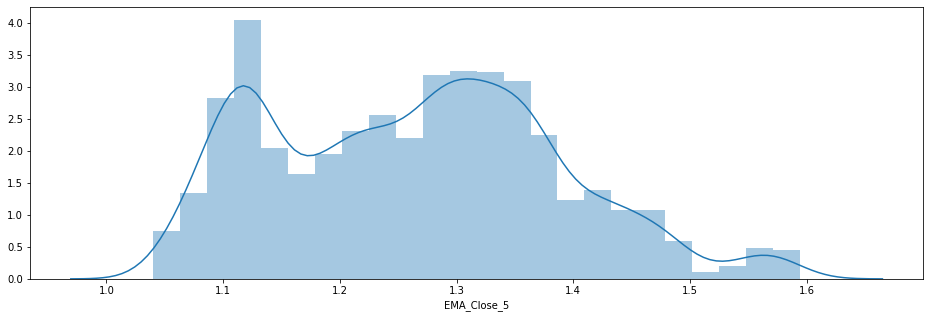

In [12]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['EMA_Close_5']);

### MOM Function

In [13]:
#Momentum  
def MOM(df, n):  
    M = pd.Series(df['Close'].diff(n), name = 'Momentum_' + str(n))  
    df = df.join(M)  
    return df

In [14]:
DATASET_FULL = MOM(DATASET_FULL, 1)
DATASET_FULL = MOM(DATASET_FULL, 2)
DATASET_FULL = MOM(DATASET_FULL, 5)
DATASET_FULL = MOM(DATASET_FULL, 24)
print(DATASET_FULL)

       Gmt time     Open     High      Low    Close        Volume  Open_Bid  \
0    2004-01-01  1.25950  1.26052  1.24698  1.25733  4.621817e+05   1.25934   
1    2004-01-02  1.25717  1.26282  1.25214  1.25832  1.066578e+06   1.25701   
2    2004-01-04  1.25925  1.26487  1.25789  1.26318  6.879980e+04   1.25855   
3    2004-01-05  1.26324  1.26935  1.26301  1.26830  1.119689e+06   1.26308   
4    2004-01-06  1.26836  1.28093  1.26666  1.27150  1.125442e+06   1.26820   
...         ...      ...      ...      ...      ...           ...       ...   
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  2.219154e+05   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  3.392159e+05   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  2.907155e+05   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  3.306924e+05   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158  1.012642e+04   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Pct_Range_

In [15]:
print(DATASET_FULL['Momentum_5'].describe())
print(DATASET_FULL['Momentum_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Momentum_5'].isnull().sum())

count    5132.000000
mean       -0.000154
std         0.015484
min        -0.082160
25%        -0.008653
50%         0.000200
75%         0.009120
max         0.107750
Name: Momentum_5, dtype: float64
5
0


(5137, 25)


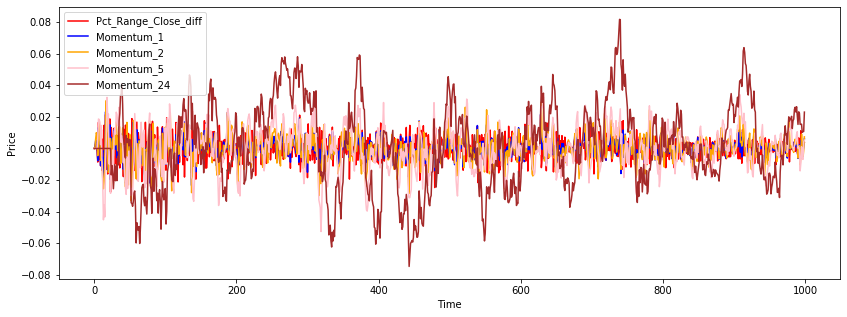

In [16]:
INICIO = 0
FIN = 1000
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Pct_Range_Close_diff'][INICIO:FIN], color = 'red', label = 'Pct_Range_Close_diff')
pyplot.plot(DATASET_FULL['Momentum_1'][INICIO:FIN], color = 'blue', label = 'Momentum_1')
pyplot.plot(DATASET_FULL['Momentum_2'][INICIO:FIN], color = 'orange', label = 'Momentum_2')
pyplot.plot(DATASET_FULL['Momentum_5'][INICIO:FIN], color = 'pink', label = 'Momentum_5')
pyplot.plot(DATASET_FULL['Momentum_24'][INICIO:FIN], color = 'brown', label = 'Momentum_24')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

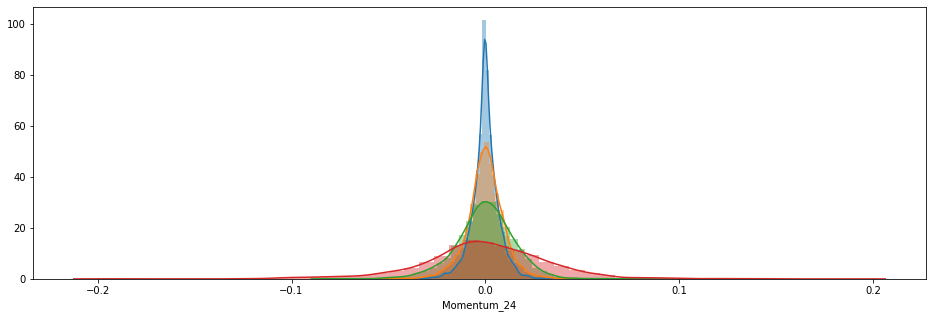

In [17]:
pyplot.figure(figsize=(16,5))
sns.distplot(DATASET_FULL['Momentum_1']);
sns.distplot(DATASET_FULL['Momentum_2']);
sns.distplot(DATASET_FULL['Momentum_5']);
sns.distplot(DATASET_FULL['Momentum_24']);


In [18]:
def get_rsi(df, n=14):
    deltas = (df['Close']-df['Close'].shift(1)).fillna(0)

    avg_of_gains = deltas[1:n+1][deltas > 0].sum() / n
    avg_of_losses = -deltas[1:n+1][deltas < 0].sum() / n

    # Set up pd.Series container for RSI values
    rsi_series = pd.Series(0.0, deltas.index)

    # Now calculate RSI using the Wilder smoothing method, starting with n+1 delta.
    up = lambda x: x if x > 0 else 0
    down = lambda x: -x if x < 0 else 0
    i = n+1
    for d in deltas[n+1:]:
        avg_of_gains = ((avg_of_gains * (n-1)) + up(d)) / n
        avg_of_losses = ((avg_of_losses * (n-1)) + down(d)) / n
        if avg_of_losses != 0:
            rs = avg_of_gains / avg_of_losses
            rsi_series[i] = 100 - (100 / (1 + rs))
        else:
            rsi_series[i] = 100
        i += 1
    df['rsi'] = rsi_series /100
    return df

In [19]:
DATASET_FULL = get_rsi(DATASET_FULL, 14)

In [20]:
DATASET_FULL

,Gmt time,Open,High,Low,Close,Volume,Open_Bid,High_Bid,Low_Bid,Close_Bid,...,MA_Close_5,MA_Close_25,MA_Close_50,MA_Close_200,EMA_Close_5,Momentum_1,Momentum_2,Momentum_5,Momentum_24,rsi
0,2004-01-01,1.25950,1.26052,1.24698,1.25733,4.621817e+05,1.25934,1.26035,1.24679,1.25723,...,0.000000,0.000000,0.000000,0.000000,1.257330,0.00000,0.00000,0.00000,0.00000,0.000000
1,2004-01-02,1.25717,1.26282,1.25214,1.25832,1.066578e+06,1.25701,1.26263,1.25198,1.25806,...,0.000000,0.000000,0.000000,0.000000,1.258072,0.00099,0.00000,0.00000,0.00000,0.000000
2,2004-01-04,1.25925,1.26487,1.25789,1.26318,6.879980e+04,1.25855,1.26477,1.25779,1.26308,...,0.000000,0.000000,0.000000,0.000000,1.261608,0.00486,0.00585,0.00000,0.00000,0.000000
3,2004-01-05,1.26324,1.26935,1.26301,1.26830,1.119689e+06,1.26308,1.26924,1.26288,1.26820,...,0.000000,0.000000,0.000000,0.000000,1.266125,0.00512,0.00998,0.00000,0.00000,0.000000
4,2004-01-06,1.26836,1.28093,1.26666,1.27150,1.125442e+06,1.26820,1.28083,1.26650,1.27140,...,1.263726,0.000000,0.000000,0.000000,1.269723,0.00320,0.00832,0.00000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5132,2020-05-26,1.09019,1.09960,1.08970,1.09787,2.219154e+05,1.09015,1.09957,1.08969,1.09784,...,1.092892,1.088177,1.088072,1.101322,1.095430,0.00768,0.00704,-0.00012,0.01459,0.600762
5133,2020-05-27,1.09788,1.10311,1.09342,1.10169,3.392159e+05,1.09785,1.10307,1.09340,1.10166,...,1.094242,1.088913,1.088046,1.101344,1.099603,0.00382,0.01150,0.00675,0.01393,0.632941
5134,2020-05-28,1.10168,1.10937,1.09919,1.10782,2.907155e+05,1.10165,1.10934,1.09916,1.10779,...,1.097680,1.089716,1.088150,1.101403,1.105081,0.00613,0.00995,0.01719,0.01330,0.677819
5135,2020-05-29,1.10780,1.11452,1.10702,1.11071,3.306924e+05,1.10778,1.11451,1.10698,1.11036,...,1.101656,1.090363,1.088460,1.101465,1.108834,0.00289,0.00902,0.01988,0.01242,0.696650


(5137, 26)


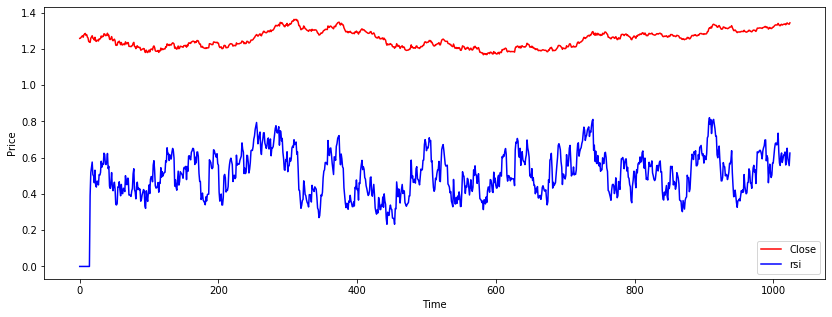

In [21]:
INICIO = 0
FIN = 1025
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['rsi'][INICIO:FIN], color = 'blue', label = 'rsi')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [22]:
print(DATASET_FULL['rsi'].describe())
print(DATASET_FULL['rsi'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['rsi'].isnull().sum())

count    5137.000000
mean        0.498585
std         0.125551
min         0.000000
25%         0.410999
50%         0.499107
75%         0.586947
max         0.844812
Name: rsi, dtype: float64
0
0


In [23]:
#Bollinger Bands  
def BBANDS(df, n):  
    no_of_std = 1.5
    MA = pd.Series(pd.Series(df['Close'].rolling(n).mean()))  
    MSD = pd.Series(pd.Series(df['Close'].rolling(n).std()))  
    
    
    df['Rolling_Mean'+ str(n)] = MA
    df['Bollinger_High'] = MA + (MSD * no_of_std)
    df['Bollinger_Low'] = MA - (MSD * no_of_std)
    
    return df

In [24]:
DATASET_FULL = BBANDS(DATASET_FULL, 25)
#DATASET_FULL = BBANDS(DATASET_FULL, 25)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  MA_Close_200  EMA_Close_5 Momentum_1  \
5132   1.09957  1.08969    1.09784  ...      1.101322     1.095430    0.00768   
5133   1.10307  1.09340    1.10166  ...      1.101344     1.099603    0.00382   
5134   1.10934  1.09916    1.10779  ...      1.101403     1.105081    0.00613   
5135   1.11451  1.10698    1.11036  ...      1.101465     1.108834    0.00289   
5136   1.11195  1.11023    1.11156  ...      1.101517     1.110665    0.00087   

      Momentum_2  Momentum_5  Momentum_24   

In [25]:
print(DATASET_FULL['Rolling_Mean25'].describe())
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
print(DATASET_FULL['Rolling_Mean25'].isnull().sum())

count    5113.000000
mean        1.264334
std         0.122031
min         1.048496
25%         1.153374
50%         1.271383
75%         1.350748
max         1.579363
Name: Rolling_Mean25, dtype: float64
24
0


In [26]:
print(DATASET_FULL['Bollinger_High'].describe())
print(DATASET_FULL['Bollinger_High'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_High'].isnull().sum())

count    5137.000000
mean        1.282867
std         0.125468
min         1.058072
25%         1.170434
50%         1.287889
75%         1.368042
max         1.602895
Name: Bollinger_High, dtype: float64
0
0


In [27]:
print(DATASET_FULL['Bollinger_Low'].describe())
print(DATASET_FULL['Bollinger_Low'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Bollinger_Low'].isnull().sum())

count    5137.000000
mean        1.245769
std         0.118897
min         1.035640
25%         1.136182
50%         1.250107
75%         1.330290
max         1.566696
Name: Bollinger_Low, dtype: float64
0
0


(5137, 29)


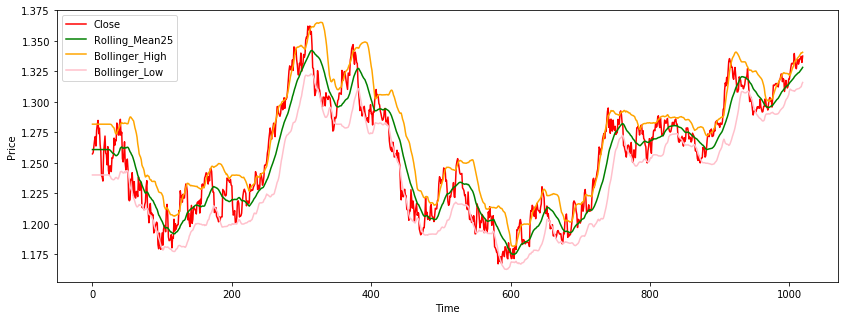

In [28]:
INICIO = 0
FIN = 1020
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Rolling_Mean25'][INICIO:FIN], color = 'green', label = 'Rolling_Mean25')
pyplot.plot(DATASET_FULL['Bollinger_High'][INICIO:FIN], color = 'orange', label = 'Bollinger_High')
pyplot.plot(DATASET_FULL['Bollinger_Low'][INICIO:FIN], color = 'pink', label = 'Bollinger_Low')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [29]:
#Pivot Points, Supports and Resistances  
def PPSR(df):  
    PP = pd.Series((df['High'] + df['Low'] + df['Close']) / 3)  
    R1 = pd.Series(2 * PP - df['Low'])  
    S1 = pd.Series(2 * PP - df['High'])  
    R2 = pd.Series(PP + df['High'] - df['Low'])  
    S2 = pd.Series(PP - df['High'] + df['Low'])  
    R3 = pd.Series(df['High'] + 2 * (PP - df['Low']))  
    S3 = pd.Series(df['Low'] - 2 * (df['High'] - PP))  
    psr = {'PP':PP, 'R1':R1, 'S1':S1, 'R2':R2, 'S2':S2, 'R3':R3, 'S3':S3}  
    PSR = pd.DataFrame(psr)  
    df = df.join(PSR)  
    return df

In [30]:
DATASET_FULL = PPSR(DATASET_FULL)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Rolling_Mean25  Bollinger_High  \
5132   1.09957  1.08969    1.09784  ...        1.088177        1.097350   
5133   1.10307  1.09340    1.10166  ...        1.088913        1.098800   
5134   1.10934  1.09916    1.10779  ...        1.089716        1.101101   
5135   1.11451  1.10698    1.11036  ...        1.090363        1.103317   
5136   1.11195  1.11023    1.11156  ...        1.090895        1.105158   

     Bollinger_Low        PP        R1        S1        R2        S2  \
5132    

In [31]:
print(DATASET_FULL['S2'].describe())
print(DATASET_FULL['S2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['S2'].isnull().sum())

count    5137.000000
mean        1.254279
std         0.121325
min         1.026643
25%         1.141500
50%         1.259817
75%         1.341213
max         1.584980
Name: S2, dtype: float64
0
0


(5137, 36)


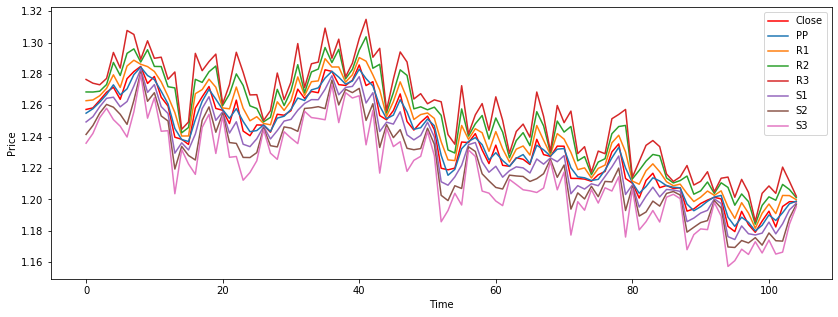

In [32]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['PP'][INICIO:FIN], label = 'PP')
pyplot.plot(DATASET_FULL['R1'][INICIO:FIN], label = 'R1')
pyplot.plot(DATASET_FULL['R2'][INICIO:FIN], label = 'R2')
pyplot.plot(DATASET_FULL['R3'][INICIO:FIN], label = 'R3')
pyplot.plot(DATASET_FULL['S1'][INICIO:FIN], label = 'S1')
pyplot.plot(DATASET_FULL['S2'][INICIO:FIN], label = 'S2')
pyplot.plot(DATASET_FULL['S3'][INICIO:FIN], label = 'S3')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
#Stochastic oscillator %K  
def STOK(df):  
    SOk = pd.Series((df['Close'] - df['Low']) / (df['High'] - df['Low']), name = 'SO%k')  
    df = df.join(SOk)  
    return df

In [34]:
DATASET_FULL = STOK(DATASET_FULL)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...  Bollinger_High  Bollinger_Low  \
5132   1.09957  1.08969    1.09784  ...        1.097350       1.079004   
5133   1.10307  1.09340    1.10166  ...        1.098800       1.079026   
5134   1.10934  1.09916    1.10779  ...        1.101101       1.078330   
5135   1.11451  1.10698    1.11036  ...        1.103317       1.077409   
5136   1.11195  1.11023    1.11156  ...        1.105158       1.076631   

            PP        R1        S1        R2        S2        R3        S3  \
5132  1.

In [35]:
print(DATASET_FULL['SO%k'].describe())
print(DATASET_FULL['SO%k'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k'].isnull().sum())

count    5137.000000
mean        0.500685
std         0.291052
min         0.000000
25%         0.228448
50%         0.508889
75%         0.768072
max         1.000000
Name: SO%k, dtype: float64
0
0


(5137, 37)


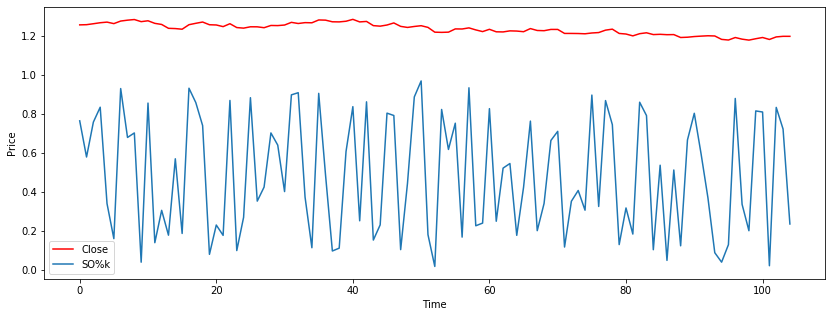

In [36]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k'][INICIO:FIN], label = 'SO%k')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [37]:
# Stochastic Oscillator, EMA smoothing, nS = slowing (1 if no slowing)  
def STO(df,  nK, nD, nS=1):  
    SOk = pd.Series((df['Close'] - df['Low'].rolling(nK).min()) / (df['High'].rolling(nK).max() - df['Low'].rolling(nK).min()), name = 'SO%k'+str(nK))  
    SOd = pd.Series(SOk.ewm(ignore_na=False, span=nD, min_periods=nD-1, adjust=True).mean(), name = 'SO%d'+str(nD))  
    SOk = SOk.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    SOd = SOd.ewm(ignore_na=False, span=nS, min_periods=nS-1, adjust=True).mean()  
    df = df.join(SOk)  
    df = df.join(SOd)  
    return df  

In [38]:
DATASET_FULL = STO(DATASET_FULL,1,2)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...        PP        R1        S1  \
5132   1.09957  1.08969    1.09784  ...  1.095723  1.101747  1.091847   
5133   1.10307  1.09340    1.10166  ...  1.099407  1.105393  1.095703   
5134   1.10934  1.09916    1.10779  ...  1.105460  1.111730  1.101550   
5135   1.11451  1.10698    1.11036  ...  1.110750  1.114480  1.106980   
5136   1.11195  1.11023    1.11156  ...  1.111343  1.112407  1.110517   

            R2        S2        R3        S3      SO%k     SO%k1     SO%d2  
5132  1.105623 

In [39]:
print(DATASET_FULL['SO%k1'].describe())
print(DATASET_FULL['SO%k1'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%k1'].isnull().sum())

print(DATASET_FULL['SO%d2'].describe())
print(DATASET_FULL['SO%d2'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['SO%d2'].isnull().sum())

count    5137.000000
mean        0.500685
std         0.291052
min         0.000000
25%         0.228448
50%         0.508889
75%         0.768072
max         1.000000
Name: SO%k1, dtype: float64
0
0
count    5137.000000
mean        0.500692
std         0.204464
min         0.035964
25%         0.326485
50%         0.501370
75%         0.674298
max         0.955865
Name: SO%d2, dtype: float64
0
0


(5137, 39)


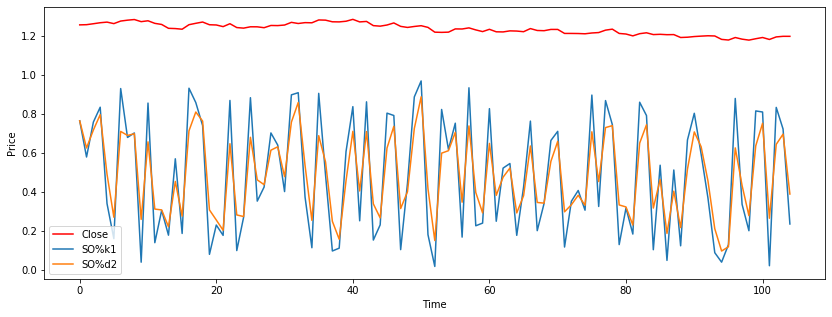

In [40]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['SO%k1'][INICIO:FIN], label = 'SO%k1')
pyplot.plot(DATASET_FULL['SO%d2'][INICIO:FIN], label = 'SO%d2')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [41]:
#Trix  
def TRIX(df, n):  
    EX1 = df['Close'].ewm(span = n, min_periods = n - 1).mean()
    EX2 = EX1.ewm(span = n, min_periods = n - 1).mean()  
    EX3 = EX2.ewm(span = n, min_periods = n - 1).mean()  
    i = 0  
    ROC_l = [0]  
    while i + 1 <= df.index[-1]:  
        ROC = (EX3[i + 1] - EX3[i]) / EX3[i]  
        ROC_l.append(ROC)  
        i = i + 1  
    Trix = pd.Series(ROC_l, name = 'Trix_' + str(n))  
    df = df.join(Trix)  
    return df

In [42]:
DATASET_FULL = TRIX(DATASET_FULL,5)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...        R1        S1        R2  \
5132   1.09957  1.08969    1.09784  ...  1.101747  1.091847  1.105623   
5133   1.10307  1.09340    1.10166  ...  1.105393  1.095703  1.109097   
5134   1.10934  1.09916    1.10779  ...  1.111730  1.101550  1.115640   
5135   1.11451  1.10698    1.11036  ...  1.114480  1.106980  1.118250   
5136   1.11195  1.11023    1.11156  ...  1.112407  1.110517  1.113233   

            S2        R3        S3      SO%k     SO%k1     SO%d2    Trix_5  
5132  1.085823 

In [43]:
print(DATASET_FULL['Trix_5'].describe())
print(DATASET_FULL['Trix_5'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Trix_5'].isnull().sum())

count    5128.000000
mean       -0.000028
std         0.001472
min        -0.007245
25%        -0.000913
50%        -0.000007
75%         0.000884
max         0.010859
Name: Trix_5, dtype: float64
9
0


(5137, 40)


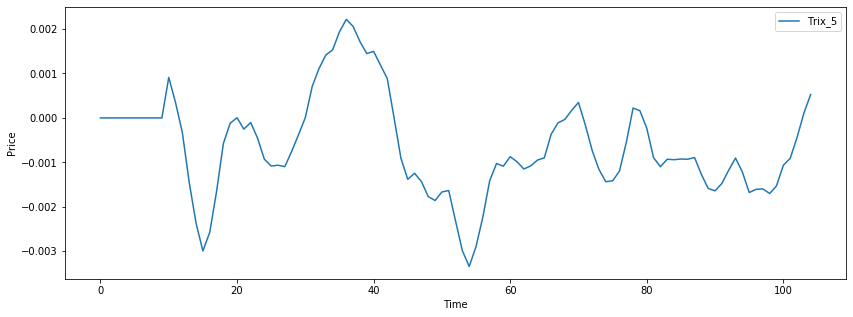

In [44]:
INICIO = 0
FIN = 105
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Trix_5'][INICIO:FIN], label = 'Trix_5')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [45]:
#MACD, MACD Signal and MACD difference  
def MACD(df, n_fast, n_slow):  
    EMAfast = pd.Series(df['Close'].ewm(span = n_fast, min_periods = n_slow-1).mean())
    EMAslow = pd.Series(df['Close'].ewm(span = n_slow, min_periods = n_fast-1).mean())
    MACD = pd.Series(EMAfast - EMAslow, name = 'MACD_' + str(n_fast) + '_' + str(n_slow))  
    MACDsign = pd.Series(MACD.ewm(span = 9, min_periods = 8).mean(), name = 'MACDsign_' + str(n_fast) + '_' + str(n_slow))  
    MACDdiff = pd.Series(MACD - MACDsign, name = 'MACDdiff_' + str(n_fast) + '_' + str(n_slow))  
    df = df.join(MACD)  
    df = df.join(MACDsign)  
    df = df.join(MACDdiff)  
    return df

In [46]:
DATASET_FULL = MACD(DATASET_FULL,5,25)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...        S2        R3        S3  \
5132   1.09957  1.08969    1.09784  ...  1.085823  1.111647  1.081947   
5133   1.10307  1.09340    1.10166  ...  1.089717  1.115083  1.086013   
5134   1.10934  1.09916    1.10779  ...  1.095280  1.121910  1.091370   
5135   1.11451  1.10698    1.11036  ...  1.103250  1.121980  1.099480   
5136   1.11195  1.11023    1.11156  ...  1.109453  1.114297  1.108627   

          SO%k     SO%k1     SO%d2    Trix_5  MACD_5_25  MACDsign_5_25  \
5132  0.825253  0.

In [47]:
print(DATASET_FULL['MACD_5_25'].describe())
print(DATASET_FULL['MACD_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACD_5_25'].isnull().sum())



count    5114.000000
mean       -0.000328
std         0.012601
min        -0.067202
25%        -0.007236
50%        -0.000074
75%         0.007355
max         0.076299
Name: MACD_5_25, dtype: float64
23
0


In [48]:
print(DATASET_FULL['MACDsign_5_25'].describe())
print(DATASET_FULL['MACDsign_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACDsign_5_25'].isnull().sum())

print(DATASET_FULL['MACDdiff_5_25'].describe())
print(DATASET_FULL['MACDdiff_5_25'].isnull().sum())
DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['MACDdiff_5_25'].isnull().sum())

count    5137.000000
mean       -0.000327
std         0.011443
min        -0.054559
25%        -0.006284
50%        -0.000088
75%         0.006560
max         0.052234
Name: MACDsign_5_25, dtype: float64
0
0
count    5137.000000
mean        0.000009
std         0.004653
min        -0.022310
25%        -0.002618
50%         0.000096
75%         0.002733
max         0.035914
Name: MACDdiff_5_25, dtype: float64
0
0


(5137, 43)


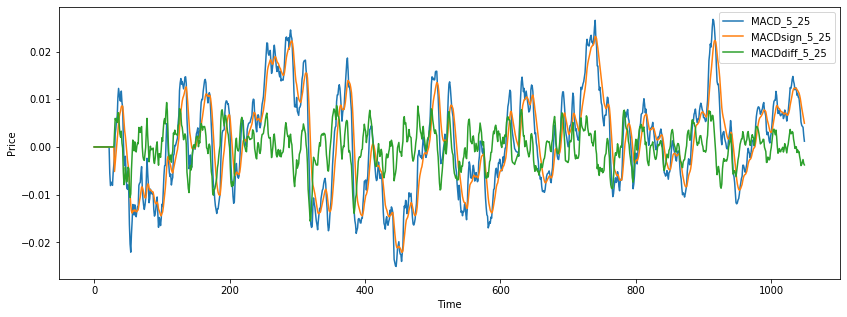

In [49]:
INICIO = 0
FIN = 1050
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
#pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['MACD_5_25'][INICIO:FIN], label = 'MACD_5_25')
pyplot.plot(DATASET_FULL['MACDsign_5_25'][INICIO:FIN], label = 'MACDsign_5_25')
pyplot.plot(DATASET_FULL['MACDdiff_5_25'][INICIO:FIN], label = 'MACDdiff_5_25')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [50]:
#Mass Index  
def MassI(df, period = 25, min_periods = 8, span=9):  
    Range = df['High'] - df['Low']  
    EX1 = Range.ewm(span = 9, min_periods = 8).mean()
    EX2 = EX1.ewm(span = 9, min_periods = 8).mean()
    Mass = EX1 / EX2  
    MassI = pd.Series(Mass.rolling(period).sum(),name = 'Mass_Index_'+str(period)+'_'+str(min_periods)+'_'+str(span))  
    df = df.join(MassI)  
    return df

In [51]:
DATASET_FULL = MassI(DATASET_FULL,25,8,9)
print(DATASET_FULL.tail(5))

       Gmt time     Open     High      Low    Close       Volume  Open_Bid  \
5132 2020-05-26  1.09019  1.09960  1.08970  1.09787  221915.4388   1.09015   
5133 2020-05-27  1.09788  1.10311  1.09342  1.10169  339215.8879   1.09785   
5134 2020-05-28  1.10168  1.10937  1.09919  1.10782  290715.4826   1.10165   
5135 2020-05-29  1.10780  1.11452  1.10702  1.11071  330692.3901   1.10778   
5136 2020-05-31  1.11213  1.11217  1.11028  1.11158   10126.4174   1.11129   

      High_Bid  Low_Bid  Close_Bid  ...        R3        S3      SO%k  \
5132   1.09957  1.08969    1.09784  ...  1.111647  1.081947  0.825253   
5133   1.10307  1.09340    1.10166  ...  1.115083  1.086013  0.853457   
5134   1.10934  1.09916    1.10779  ...  1.121910  1.091370  0.847741   
5135   1.11451  1.10698    1.11036  ...  1.121980  1.099480  0.492000   
5136   1.11195  1.11023    1.11156  ...  1.114297  1.108627  0.687831   

         SO%k1     SO%d2    Trix_5  MACD_5_25  MACDsign_5_25  MACDdiff_5_25  \
5132  0.82525

In [52]:
print(DATASET_FULL['Mass_Index_25_8_9'].describe())
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())
DATASET_FULL.fillna(method='backfill', inplace=True)
#DATASET_FULL.fillna(0, inplace=True)
print(DATASET_FULL['Mass_Index_25_8_9'].isnull().sum())

count    5099.000000
mean       24.950176
std         0.835848
min        21.687426
25%        24.450495
50%        24.895582
75%        25.375500
max        30.744898
Name: Mass_Index_25_8_9, dtype: float64
38
0


(5137, 44)


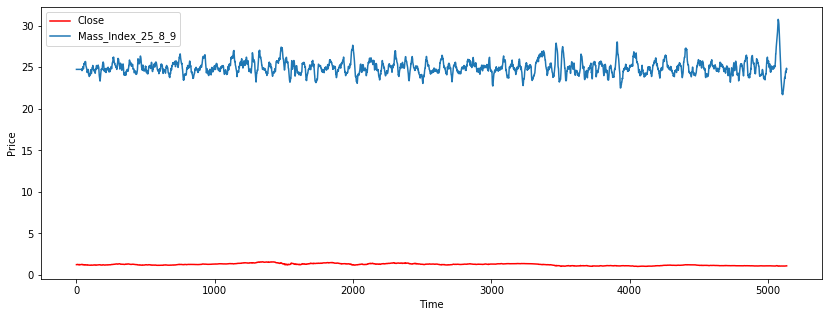

In [53]:
INICIO = 0
FIN = 10500
print(DATASET_FULL.shape)
plt.figure(figsize=(14,5))
pyplot.plot(DATASET_FULL['Close'][INICIO:FIN], color = 'red', label = 'Close')
pyplot.plot(DATASET_FULL['Mass_Index_25_8_9'][INICIO:FIN], label = 'Mass_Index_25_8_9')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

### Save CSV File 'DF_EURUSD_ASK_1H_PROC.csv'

In [54]:
#Get the Final number of Features
NUM_FEATURES = str(DATASET_FULL.shape[1])
filename = 'R-' + SOURCE_TYPE + '_' + FRECUENCIA + '_' + NUM_FEATURES + 'F.csv'
print(filename)

R-EURUSD_FULL_1D_44F.csv


In [55]:
DATASET_FULL.columns

Index(['Gmt time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Open_Bid',
       'High_Bid', 'Low_Bid', 'Close_Bid', 'Volume_Bid', 'Spread', 'day_name',
       'weekday', 'Pct_Range_Close', 'Pct_Range_Close_diff', 'MA_Close_5',
       'MA_Close_25', 'MA_Close_50', 'MA_Close_200', 'EMA_Close_5',
       'Momentum_1', 'Momentum_2', 'Momentum_5', 'Momentum_24', 'rsi',
       'Rolling_Mean25', 'Bollinger_High', 'Bollinger_Low', 'PP', 'R1', 'S1',
       'R2', 'S2', 'R3', 'S3', 'SO%k', 'SO%k1', 'SO%d2', 'Trix_5', 'MACD_5_25',
       'MACDsign_5_25', 'MACDdiff_5_25', 'Mass_Index_25_8_9'],
      dtype='object')

In [56]:
pwd = os.getcwd()
filename_path = os.path.join(pwd, r'../../../../Datasets/Junio2020/procesados-regression/' + filename)
DATASET_FULL.to_csv(filename_path, header=True, index=False)